In [1]:
import sys
# sys.path.append("D:\thesis\thesis\rllib")

import rllib as rl
import json
import joblib
import numpy as np
import torch
dataset_train = "./data_preprossing/output/train_cleaned.csv"
dataset_test = "./data_preprossing/output/test_cleaned.csv"
symptom_map_file = "./data/basic/symptoms_db.json"
condition_map_file = "./data/basic/conditions_db.json"
# clf_file = "data/basic/data/output/rf/rf_clf.joblib"
# clf_file = "data/basic/data/output/rf/rf_clf.joblib"
clf_file = "./symtom_models/output/nb_nlice/nb_serialized_sparse.joblib"
clf_data = joblib.load(clf_file)
clf = clf_data.get('clf')
import datetime
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
sys.path.append(parent_path) # add current terminal path to sys.path
curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # obtain current time
test ="./data_preprossing/output/data/total_v1.csv"

In [2]:
env = rl.environment.RLBasicMedEnvNOPATIENT(
    data_file=test,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="nb",
    max_turn=20,
    epoch = 1000
)

In [2]:
env = rl.environment.RLBasicMedEnv(
    data_file=test,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="nb",
    max_turn=20,
    epoch = 1000
)

In [3]:
cfg = rl.config.QlearningConfig()
agent = rl.agent.AgentQlearning(env,cfg,False)

In [4]:
bench = rl.bench.MedQBench(agent,50000,1)
bench.run_trial(debug=False)
cfg = rl.config.QlearningConfig()
rl.common.make_dir(cfg.result_path,cfg.model_path)
agent.save(cfg.model_path)

save model successfully


In [6]:

rewards,success,average_rewards,average_steps =bench.rewardList,bench.get_success_rate(),bench.get_average_rewards(),bench.get_average_turn()
print(success)
print(average_rewards,average_steps)

# testbench = rl.bench.MedBenchEval(agent,1000)
# testbench.run_trial(debug=False)


rewards,success,average_steps=rl.bench.eval(env,agent,1000)
print(success/1000)
print(np.mean(rewards),np.mean(average_steps))

0.00104
-18.0556 4.98054
0.004
-16.98 6.855


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.font_manager import FontProperties

def plot_loss(loss,tag="train",env="milestone1",algo = "DQN"):
    sns.set()
    plt.title("average learning curve of {} for {}".format(algo,env))
    plt.xlabel('epsiodes')
    plt.plot(loss,label='loss')
    plt.legend()


def plot_rewards(rewards,tag="train",env="milestone1",algo = "DQN"):
    sns.set()
    plt.title("average learning curve of {} for {}".format(algo,env))
    plt.xlabel('epsiodes')
    plt.plot(rewards,label='reward')
    plt.legend()


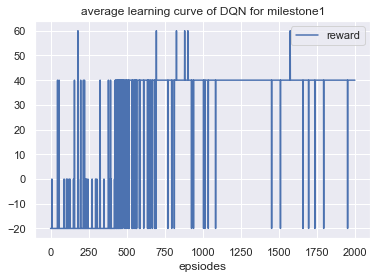

In [36]:
# plot_rewards(rewards)
eval = rewards
success = 0
plot_rewards(eval)
